In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # for progress bars

# Get the current working directory (where the Jupyter notebook is located)
current_directory = os.getcwd()

# Paths to your dataset (use relative paths)
train_csv_path = os.path.join(current_directory, 'train.csv')
train_images_path = os.path.join(current_directory, 'train_images/')

# Load the CSV
train_csv = pd.read_csv(train_csv_path)

# Add image paths to the dataframe
train_csv['image_path'] = train_csv['id_code'].apply(lambda x: os.path.join(train_images_path, x + ".png"))

# Split into training and validation data
X_train_paths, X_val_paths, y_train, y_val = train_test_split(
    train_csv['image_path'], train_csv['diagnosis'],
    test_size=0.10, random_state=42, stratify=train_csv['diagnosis']
)

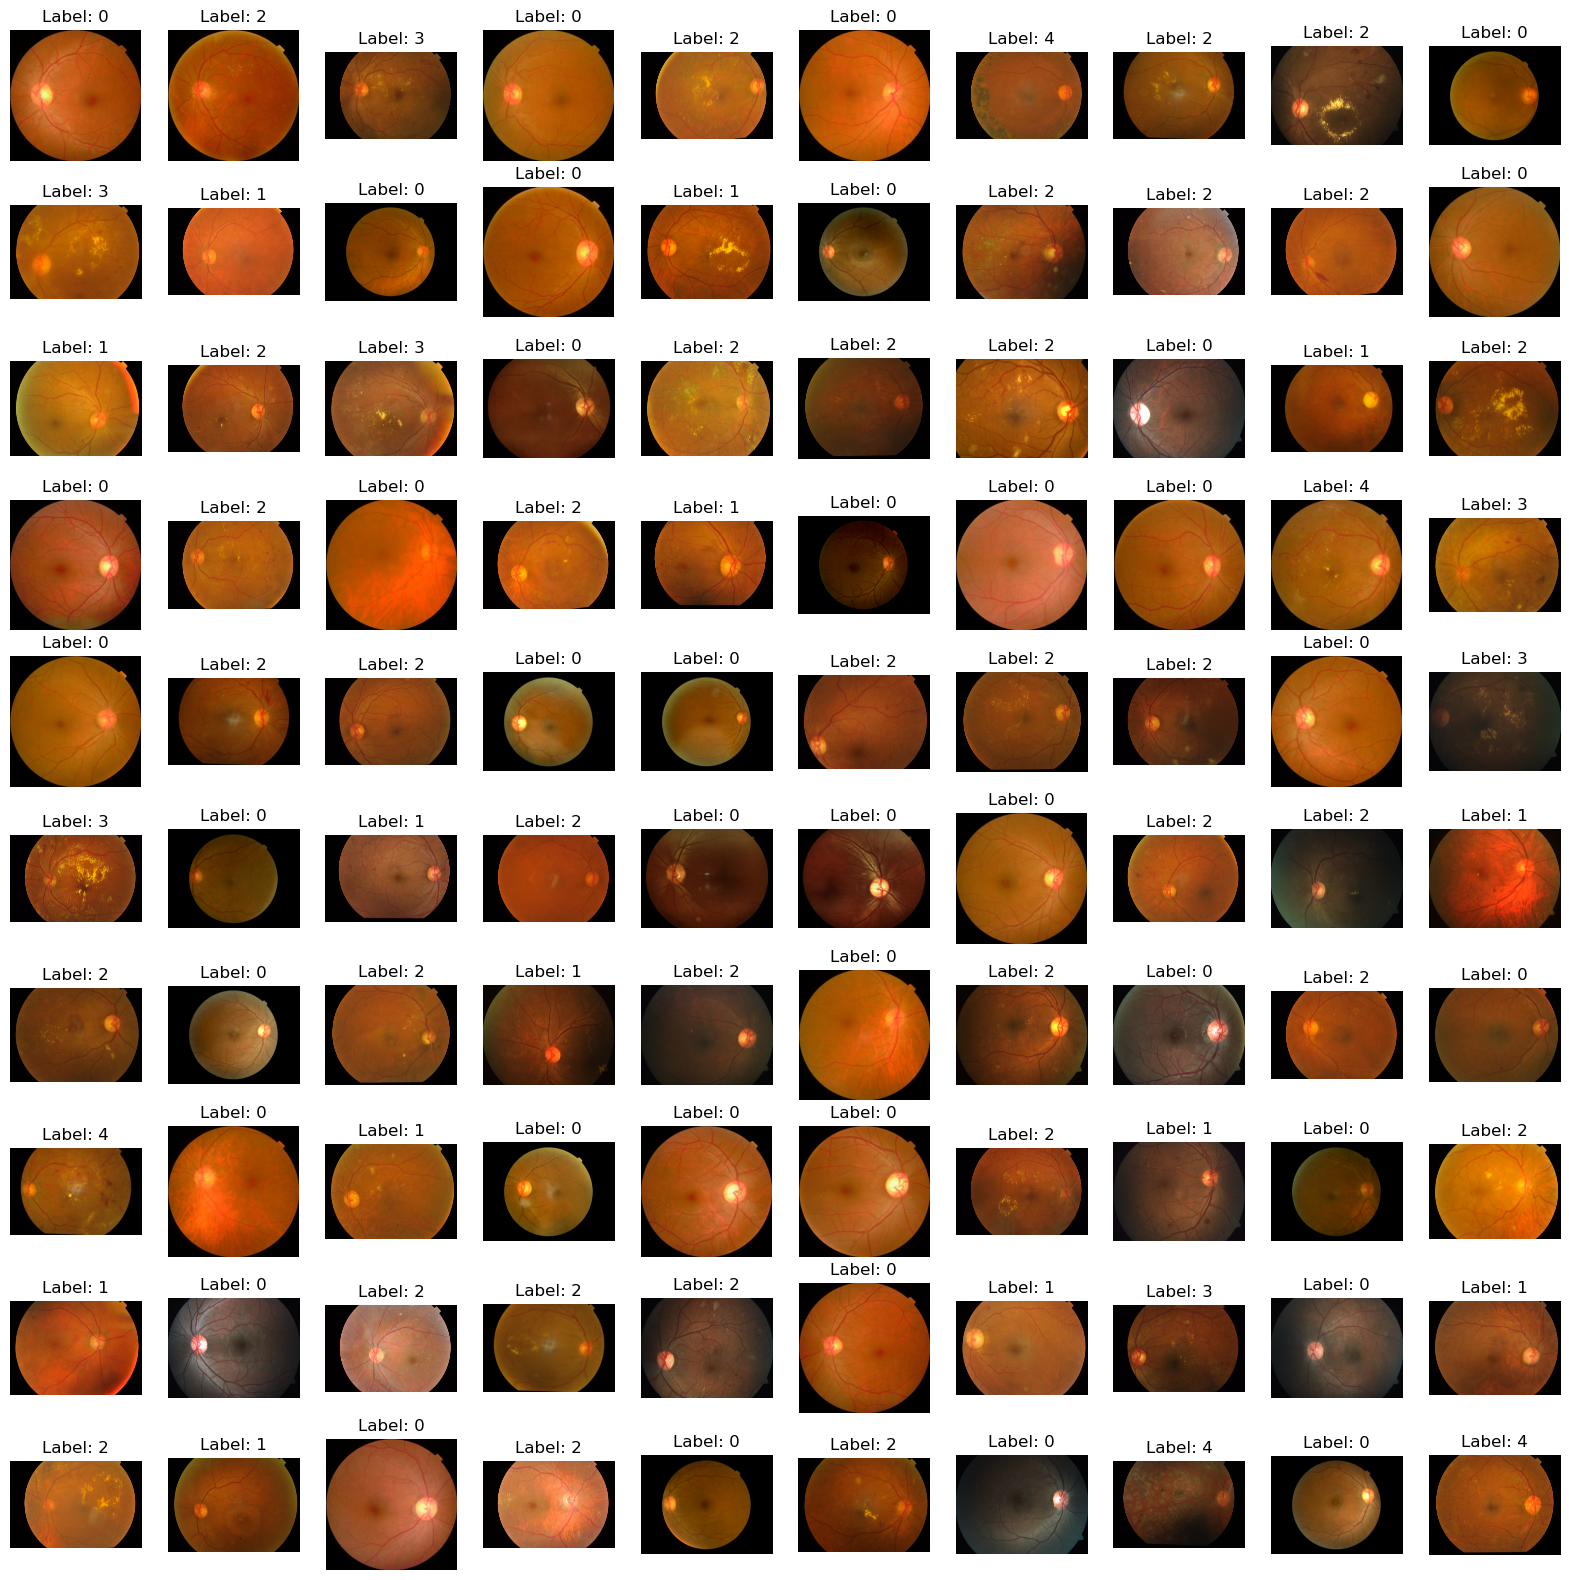

In [2]:
plt.figure(figsize=(20, 20))

for i in range(100):
    img_path = X_train_paths.iloc[i]
    label = y_train.iloc[i]
    
    # Load using OpenCV
    img = cv2.imread(img_path)  # BGR
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    plt.subplot(10, 10, i + 1)
    plt.imshow(img)
    plt.title(f'Label: {y_train.iloc[i]}')
    plt.axis('off')

plt.show()

In [3]:
# Create dataframes for training and validation datasets
train_data = pd.DataFrame({
    'id_code': [os.path.basename(path).replace('.png', '') for path in X_train_paths],
    'diagnosis': y_train
})
val_data = pd.DataFrame({
    'id_code': [os.path.basename(path).replace('.png', '') for path in X_val_paths],
    'diagnosis': y_val
})

# Save the training and validation datasets as CSV files
train_data.to_csv(os.path.join(current_directory, 'training_data.csv'), index=False)
val_data.to_csv(os.path.join(current_directory, 'testing_data.csv'), index=False)

print(f"Training CSV saved as: {os.path.join(current_directory, 'training_data.csv')}")
print(f"Testing CSV saved as: {os.path.join(current_directory, 'testing_data.csv')}")

Training CSV saved as: C:\Users\R C KARGETI\Desktop\dr\training_data.csv
Testing CSV saved as: C:\Users\R C KARGETI\Desktop\dr\testing_data.csv


In [8]:
# Preprocessing functions (same as before)
def clahe(image, clip_limit=5.0, tile_grid_size=(8, 8)):
    clahe_obj = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    channels = cv2.split(image)
    clahe_channels = [clahe_obj.apply(channel) for channel in channels]
    return cv2.merge(clahe_channels)

def adjust_brightness_contrast(image, brightness=30, contrast=50):
    image = np.int16(image)
    image = image * (contrast / 127 + 1) - contrast + brightness
    return np.clip(image, 0, 255).astype(np.uint8)

def preprocess_image(image_path, apply_clahe=True):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to 224x224
    if apply_clahe:
        image = clahe(image)
    image = adjust_brightness_contrast(image)
    image = image / 255.0  # Normalize
    return image

In [9]:
# # Preprocess and save images as .npy files using tqdm for progress
# X_train_preprocessed = np.array([preprocess_image(img_path) for img_path in tqdm(X_train_paths, desc="Processing Training Images")])
# X_val_preprocessed = np.array([preprocess_image(img_path) for img_path in tqdm(X_val_paths, desc="Processing Validation Images")])

# # Save preprocessed data to .npy files
# np.save(os.path.join(current_directory, 'X_train_preprocessed.npy'), X_train_preprocessed)
# np.save(os.path.join(current_directory, 'X_val_preprocessed.npy'), X_val_preprocessed)

Processing Validation Images: 100%|██████████████████████████████████████████████████| 367/367 [00:26<00:00, 13.91it/s]


In [ ]:
# ABOVE STEP IS ONE TIME COST!
# Load Saved Arrays:
# Replace the preprocessing step with:
# Load preprocessed data from .npy files
X_train_preprocessed = np.load('X_train_preprocessed.npy')
X_val_preprocessed = np.load('X_val_preprocessed.npy')

In [10]:
print(f"X_train shape: {X_train_preprocessed.shape}")  # (3295, 224, 224, 3)
print(f"y_train shape: {y_train.shape}")  # (3295,)
print(f"X_val shape: {X_val_preprocessed.shape}")  # (367, 224, 224, 3)
print(f"y_val shape: {y_val.shape}")  # (367,)

X_train shape: (3295, 224, 224, 3)
y_train shape: (3295,)
X_val shape: (367, 224, 224, 3)
y_val shape: (367,)


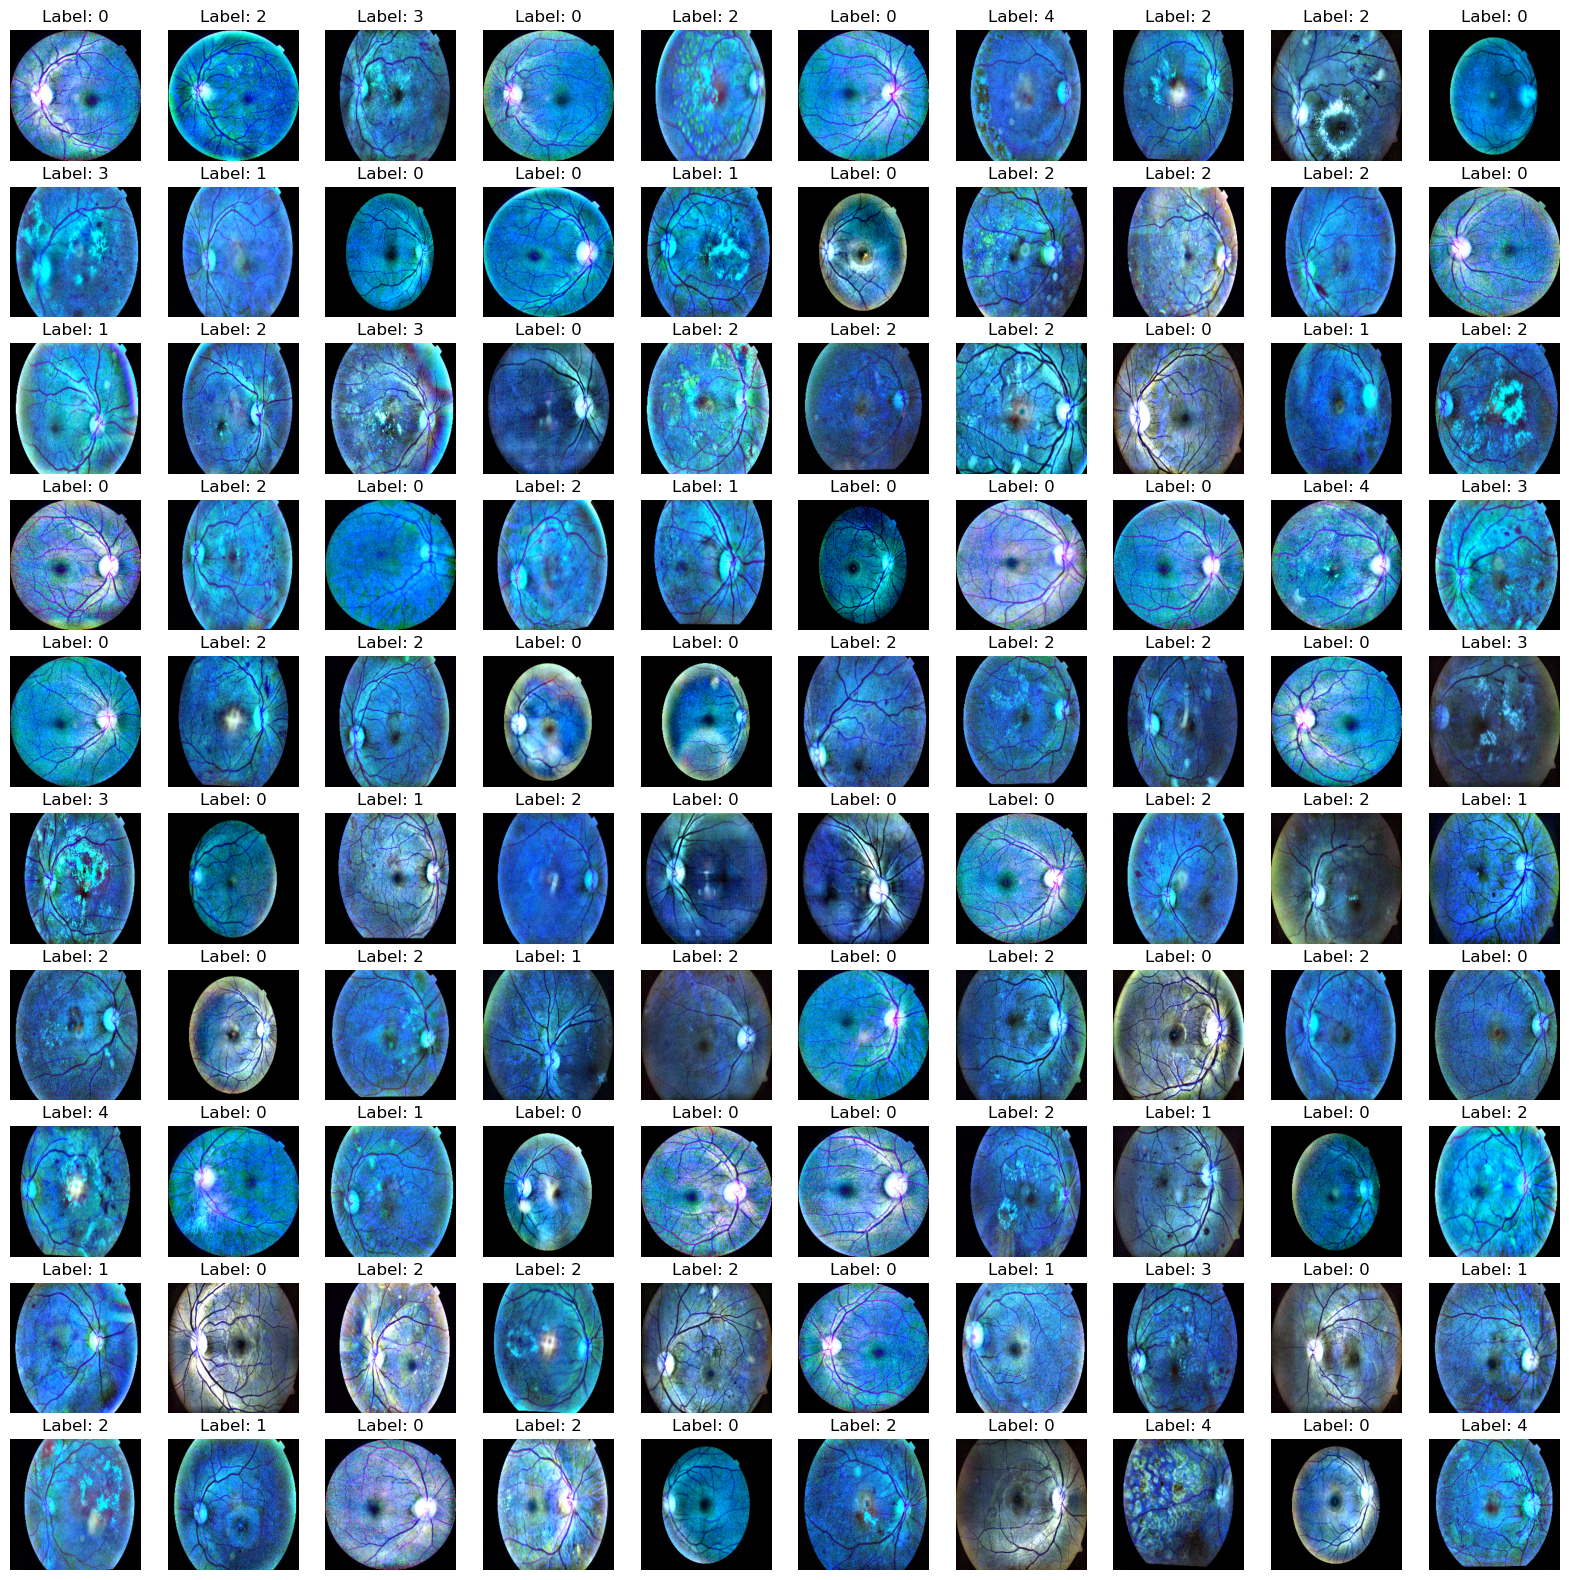

In [11]:
plt.figure(figsize=(20, 20))

for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train_preprocessed[i])  # Already preprocessed image (assumed RGB)
    plt.title(f'Label: {y_train.iloc[i]}')
    plt.axis('off')
plt.show()